In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SIZE = 1000
np.random.seed(1337)

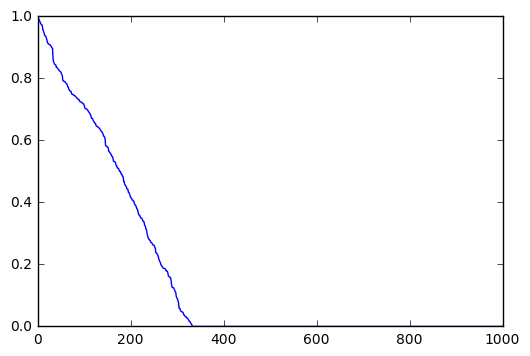

In [3]:
s = np.zeros(SIZE)
s[:SIZE//3] = np.random.rand(SIZE//3)
s = np.sort(s)[::-1]
plt.plot(s)
plt.show()

In [4]:
u = np.random.rand(SIZE, SIZE)
#u = np.matmul(u, np.matmul(np.eye(SIZE), u.T))
v = np.random.rand(SIZE, SIZE)
#v = np.matmul(v, np.matmul(np.eye(SIZE), v.T))

In [5]:
m = np.matmul(np.matmul(u, np.diag(s)), v)

In [6]:
m /= np.sum(m, 0)

In [7]:
"""
(u1, s1, v1) = np.linalg.svd(m)
plt.plot(s1[1:])
plt.show()
"""

'\n(u1, s1, v1) = np.linalg.svd(m)\nplt.plot(s1[1:])\nplt.show()\n'

In [8]:
np.mean(m[0])

0.0010064659639179617

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Lambda
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.initializers import Constant
from keras.optimizers import Adamax

print(K.floatx())

x_train = m[: SIZE // 10 * 8]
x_test = m[SIZE // 10 * 8:]
input_dim = 10

encoding_dim = 1

output_dim = 2

model = Sequential([
    Dense(encoding_dim, input_dim=input_dim, dtype='float64', use_bias=False),
    Dense(output_dim, dtype='float64', use_bias=False),
])

model.compile(optimizer=Adamax(lr=0.5, epsilon=1e-32),
              loss='mse')



Using TensorFlow backend.


float64


In [10]:
model.fit(x_train[:,:input_dim], x_train[:,:output_dim], epochs=100, batch_size=1, validation_data=(x_test[:,:input_dim], x_test[:,:output_dim]), callbacks=[TensorBoard(histogram_freq=1)])

Train on 800 samples, validate on 200 samples
INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.
INFO:tensorflow:Summary name dense_2/kernel:0 is illegal; using dense_2/kernel_0 instead.
Epoch 1/100
800/800 [==============================] - 1s - loss: 1.8340e-08 - val_loss: 1.4109e-09
Epoch 2/100
800/800 [==============================] - 1s - loss: 2.1571e-09 - val_loss: 4.0895e-09
Epoch 3/100
800/800 [==============================] - 1s - loss: 1.6810e-09 - val_loss: 4.6019e-10
Epoch 4/100
800/800 [==============================] - 1s - loss: 3.0890e-09 - val_loss: 8.3254e-10
Epoch 5/100
800/800 [==============================] - 1s - loss: 2.9125e-09 - val_loss: 7.4921e-09
Epoch 6/100
800/800 [==============================] - 1s - loss: 2.6670e-09 - val_loss: 1.1716e-09
Epoch 7/100
800/800 [==============================] - 1s - loss: 2.2786e-09 - val_loss: 3.0841e-10
Epoch 8/100
800/800 [==============================] - 1s - loss: 1.9700e-

In [11]:
for layer in model.layers:
    print(layer.get_weights())

[array([[-0.95045241],
       [-0.85520178],
       [-0.25777022],
       [ 0.03325722],
       [-0.06485901],
       [-0.06067772],
       [ 0.05136988],
       [ 0.00644065],
       [-0.01129518],
       [-0.0272959 ]])]
[array([[-0.46318516, -0.46157211]])]
